Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Saving bd-visa-classic-card-498x280.png to bd-visa-classic-card-498x280 (2).png
Image loaded successfully


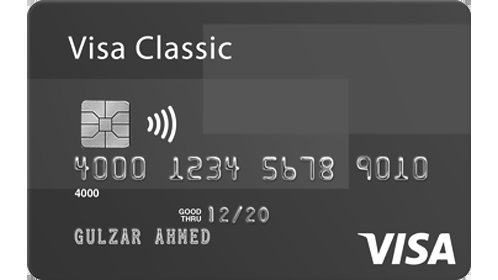

Extracted Credit Card Number: 2812720


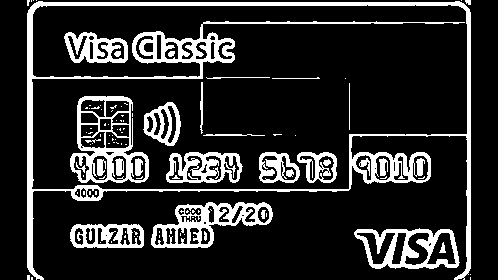

In [12]:
# Install Tesseract and pytesseract in Google Colab
!apt-get install -y tesseract-ocr
!pip install pytesseract

# Import necessary libraries
from google.colab import files
import pytesseract
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use this in Colab for imshow

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# subir tu foto, boton ubicado cuando se ejecuta al final del codigo
uploaded = files.upload()

file_name = list(uploaded.keys())[0]

# leer la imagen en grayscale
img_gris = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# verificar que se monto bien
if img_gris is None:
    print("Error loading image. Check the file format.")
else:
    print("Image loaded successfully")

    # moatrar la imagen original
    try:
        cv2_imshow(img_gris)
    except Exception as e:
        print(f"cv2_imshow error: {e}")
        # Fallback to using matplotlib if cv2_imshow fails
        import matplotlib.pyplot as plt
        plt.imshow(img_gris, cmap='gray')
        plt.axis('off')
        plt.show()

    #  cambiar a imagen binaria
    binary = cv2.adaptiveThreshold(img_gris, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    #  encontrar contornos de los numeros de tarjeta
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # filtrar contornos por area de imagen
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]  # Adjust as necessary

    # procesar los contornos
    text = ""
    for cnt in contours:
        # Get bounding box for each contour
        x, y, w, h = cv2.boundingRect(cnt)

        # Crop the image around the bounding box
        cropped = img_gris[y:y+h, x:x+w]

        # Preprocess the cropped area to improve OCR recognition
        cropped = cv2.GaussianBlur(cropped, (5, 5), 0)  # Reduce noise
        _, cropped_binary = cv2.threshold(cropped, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Use pytesseract to extract the text (numbers) from the cropped image
        extracted_text = pytesseract.image_to_string(cropped_binary, config='--psm 6 -c tessedit_char_whitelist=0123456789').strip()

        if extracted_text.isdigit():  # verificar que son todos digitos
            text += extracted_text + " "

    #  procesar el texto de la imagen
    # Clean up and format the result (e.g., remove extra spaces, validate format)
    credit_card_number = text.replace(" ", "")  # Remove spaces if needed

    # Print the result
    print(f"Extracted Credit Card Number: {credit_card_number}")

    # mostrar la imagen binaria
    cv2_imshow(binary)
